Importing necessary libraries

In [107]:
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

import matplotlib.pyplot as plt  # Plotting library
import matplotlib.patches as mpatches  # Used for adding shapes to plots
import seaborn as sns  # Advanced statistical plotting

from sklearn.model_selection import train_test_split  # Split data into train and test sets
from sklearn.preprocessing import MinMaxScaler  # Feature scaling
from sklearn.metrics import mean_squared_error  # Calculate the mean squared error

import tensorflow as tf  # Machine learning and neural networks
from keras.models import Sequential  # Model type to create a sequence of layers
from keras.layers import Dense, Dropout, LSTM  # Commonly used layers in neural networks

In [108]:
file_path = './testset.csv'  # Define the path to the dataset file

# Load the dataset from the CSV file into a pandas DataFrame
data_frame = pd.read_csv(file_path)

# Strip leading and trailing spaces from column names
data_frame.columns = data_frame.columns.str.strip()

# Print the number of rows in the DataFrame
print(len(data_frame))

# Display the first five rows of the DataFrame
data_frame.head()

100990


,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


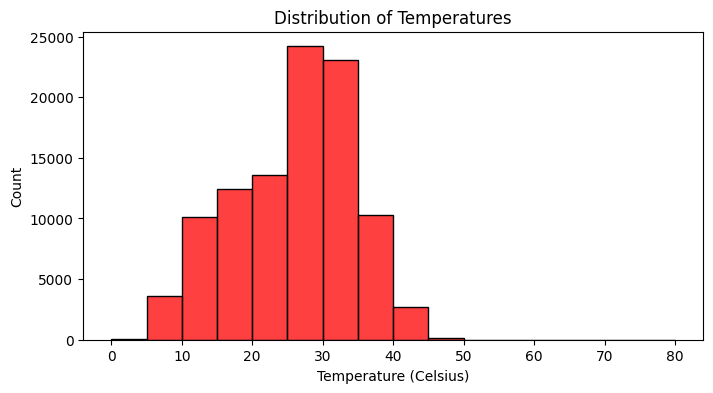

In [109]:
plt.figure(figsize=(8, 4))  # Set the size of the figure for the plot
# Create a histogram plot for the temperature data using seaborn's histplot
sns.histplot(data_frame['_tempm'], bins=[i for i in range(0, 81, 5)], kde=False, color='red')
plt.xlabel("Temperature (Celsius)")
plt.title("Distribution of Temperatures")  # Set the title of the plot
plt.show()  # Display the plot


In [110]:
# Set the DataFrame index to the datetime values converted from the 'datetime_utc' column
data_frame.index = pd.to_datetime(data_frame['datetime_utc'])

# List of column names that are selected for further analysis
selected_columns = ['_dewptm', '_fog', '_hail', '_hum', '_rain', '_snow', '_tempm']

# Filter the DataFrame to include only the columns listed in selected_columns
filtered_data = data_frame[selected_columns]

# Display the first five rows of the filtered DataFrame
filtered_data.head()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm
datetime_utc,,,,,,,
1996-11-01 11:00:00,9.0,0,0,27.0,0,0,30.0
1996-11-01 12:00:00,10.0,0,0,32.0,0,0,28.0
1996-11-01 13:00:00,11.0,0,0,44.0,0,0,24.0
1996-11-01 14:00:00,10.0,0,0,41.0,0,0,24.0
1996-11-01 16:00:00,11.0,0,0,47.0,0,0,23.0


In [111]:
# Calculate the count of missing values in each column of the filtered DataFrame
missing_values_count = filtered_data.isnull().sum()
missing_values_count  # Display the total missing values per column

_dewptm    621
_fog         0
_hail        0
_hum       757
_rain        0
_snow        0
_tempm     673
dtype: int64

In [112]:
# Fill missing values by propagating non-null values backward in the DataFrame
filtered_data = filtered_data.bfill()

# Display the last five rows of the DataFrame to verify the backfill operation
filtered_data.tail()

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm
datetime_utc,,,,,,,
2017-04-24 06:00:00,17.0,0,0,25.0,0,0,34.0
2017-04-24 09:00:00,14.0,0,0,16.0,0,0,38.0
2017-04-24 12:00:00,12.0,0,0,14.0,0,0,36.0
2017-04-24 15:00:00,15.0,0,0,27.0,0,0,32.0
2017-04-24 18:00:00,15.0,0,0,30.0,0,0,30.0


In [113]:
# Group the filtered data by day and calculate the mean for each group
daily_mean_data = filtered_data.groupby(pd.Grouper(freq='D')).mean()

# Display the first five rows of the daily averaged data to check the results
daily_mean_data.head()

# len(daily_mean_data)

,_dewptm,_fog,_hail,_hum,_rain,_snow,_tempm
datetime_utc,,,,,,,
1996-11-01,11.666667,0.0,0.0,52.916667,0.0,0.0,22.333333
1996-11-02,10.458333,0.0,0.0,48.625000,0.0,0.0,22.916667
1996-11-03,12.041667,0.0,0.0,55.958333,0.0,0.0,21.791667
1996-11-04,10.222222,0.0,0.0,48.055556,0.0,0.0,22.722222
1996-11-05,8.200000,0.0,0.0,29.400000,0.0,0.0,27.800000


In [114]:
missing_values_in_daily_mean = daily_mean_data.isnull().sum()
missing_values_in_daily_mean

_dewptm    141
_fog       141
_hail      141
_hum       141
_rain      141
_snow      141
_tempm     141
dtype: int64

In [115]:
daily_mean_data = daily_mean_data.bfill()
missing_values_in_daily_mean = daily_mean_data.isnull().sum()
missing_values_in_daily_mean

_dewptm    0
_fog       0
_hail      0
_hum       0
_rain      0
_snow      0
_tempm     0
dtype: int64

In [116]:
# Initialize the MinMaxScaler to scale the data between 0 and 1
normalizer = MinMaxScaler()

# Apply the normalizer to the daily mean data and fit-transform the values
normalized_data = normalizer.fit_transform(daily_mean_data)

# Set the number of time steps per sequence and the number of features from the data shape
time_steps = 30
features_count = daily_mean_data.shape[1]

# Generate input sequences for the model by creating a list of 30-day windows throughout the dataset
sequence_data = [normalized_data[i:i+time_steps] for i in range(len(normalized_data) - time_steps)]

# Create the target data by referencing the temperature value at the end of each sequence
target_data = [normalized_data[i+time_steps, daily_mean_data.columns.get_loc('_tempm')] for i in range(len(normalized_data) - time_steps)]

# Convert the list of sequences and targets into numpy arrays for model training
sequence_array = np.array(sequence_data)
target_array = np.array(target_data)

# Calculate the index for splitting the data into training (80%) and testing (20%)
train_size = int(0.8 * len(sequence_array))

# Split the data into training and testing sets based on the calculated index
train_sequences, test_sequences = sequence_array[:train_size], sequence_array[train_size:]
train_targets, test_targets = target_array[:train_size], target_array[train_size:]

# Print the shapes of the training and testing data sets to verify their dimensions
print("Train sequences shape:", train_sequences.shape)
print("Train targets shape:", train_targets.shape)
print("Test sequences shape:", test_sequences.shape)
print("Test targets shape:", test_targets.shape)

Train sequences shape: (5960, 30, 7)
Train targets shape: (5960,)
Test sequences shape: (1490, 30, 7)
Test targets shape: (1490,)


# **LSTM**

In [117]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Initialize the Sequential model object to build the LSTM model
model = Sequential()

# Add an LSTM layer with 128 units; expect input of shape (timesteps, features) and return sequences for next layer
model.add(LSTM(units=128, input_shape=(train_sequences.shape[1], train_sequences.shape[2]), return_sequences=True))
# Add dropout for regularization to prevent overfitting, dropping out 20% of nodes
model.add(Dropout(0.2))

# Add another LSTM layer with 64 units and return sequences for further layers
model.add(LSTM(units=64, return_sequences=True))
# Another dropout layer
model.add(Dropout(0.2))

# Final LSTM layer with 32 units, does not return sequences to flatten the output for the dense layer
model.add(LSTM(units=32, return_sequences=False))
# Last dropout layer
model.add(Dropout(0.2))

# Add a dense output layer with a single unit for regression output
model.add(Dense(units=1))

# Compile the model specifying the optimizer and loss function to use
model.compile(optimizer='adam', loss='mean_squared_error')

# Output the model summary to show the architecture and parameters
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 30, 128)           69632     
                                                                 
 dropout_18 (Dropout)        (None, 30, 128)           0         
                                                                 
 lstm_13 (LSTM)              (None, 30, 64)            49408     
                                                                 
 dropout_19 (Dropout)        (None, 30, 64)            0         
                                                                 
 lstm_14 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                

In [118]:
# Configure early stopping based on validation loss; stop training after 10 epochs with no improvement and restore best weights
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Configure model checkpointing to save only the best model based on validation loss to a file
checkpoint = ModelCheckpoint('./lstm_model_weights.h5', monitor='val_loss', save_best_only=True)

# Train the model on the training data, with specified batch size and number of epochs, while splitting part of the training data as validation data
training_history = model.fit(
    train_sequences, train_targets,  # training data and targets
    epochs=50,  # number of epochs to train
    batch_size=64,  # number of samples per gradient update
    validation_split=0.2,  # percentage of data to use for validation
    callbacks=[early_stop, checkpoint]  # list of callbacks to apply during training
)

Epoch 1/50
75/75 [==============================] - 7s 27ms/step - loss: 0.0226 - val_loss: 0.0058
Epoch 2/50
12/75 [===>..........................] - ETA: 0s - loss: 0.0111

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


75/75 [==============================] - 1s 12ms/step - loss: 0.0099 - val_loss: 0.0044
Epoch 3/50
75/75 [==============================] - 1s 12ms/step - loss: 0.0095 - val_loss: 0.0054
Epoch 4/50
75/75 [==============================] - 1s 12ms/step - loss: 0.0086 - val_loss: 0.0042
Epoch 5/50
75/75 [==============================] - 1s 12ms/step - loss: 0.0085 - val_loss: 0.0047
Epoch 6/50
75/75 [==============================] - 1s 17ms/step - loss: 0.0078 - val_loss: 0.0065
Epoch 7/50
75/75 [==============================] - 1s 18ms/step - loss: 0.0079 - val_loss: 0.0036
Epoch 8/50
75/75 [==============================] - 1s 16ms/step - loss: 0.0074 - val_loss: 0.0041
Epoch 9/50
75/75 [==============================] - 1s 12ms/step - loss: 0.0073 - val_loss: 0.0043
Epoch 10/50
75/75 [==============================] - 1s 13ms/step - loss: 0.0070 - val_loss: 0.0036
Epoch 11/50
75/75 [==============================] - 1s 12ms/step - loss: 0.0063 - val_loss: 0.0038
Epoch 12/50
75/75 [

# **GRU**

In [119]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Initialize a Sequential model
model_gru = Sequential([
    GRU(128, input_shape=(train_sequences.shape[1], train_sequences.shape[2]), return_sequences=True),
    Dropout(0.2),  # Add dropout for regularization, drop 20% of the inputs
    BatchNormalization(),  # Normalize the activations of the previous layer at each batch

    GRU(64, return_sequences=True, kernel_regularizer=l2(0.01)),  # GRU layer with L2 regularization
    Dropout(0.2),  # Dropout to prevent overfitting
    BatchNormalization(),  # Normalize activations

    GRU(32, return_sequences=False),  # GRU layer that returns only the last output
    Dropout(0.2),  # Additional dropout layer

    Dense(1)  # Output layer with a single neuron for regression output
])

# Configure the model for training
optimizer = Adam(learning_rate=0.001)  # Use Adam optimizer with a learning rate of 0.001
model_gru.compile(optimizer=optimizer, loss='mean_squared_error')  # Compile the model with mean squared error loss

# Display the model's architecture
model_gru.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 30, 128)           52608     
                                                                 
 dropout_21 (Dropout)        (None, 30, 128)           0         
                                                                 
 batch_normalization_4 (Bat  (None, 30, 128)           512       
 chNormalization)                                                
                                                                 
 gru_7 (GRU)                 (None, 30, 64)            37248     
                                                                 
 dropout_22 (Dropout)        (None, 30, 64)            0         
                                                                 
 batch_normalization_5 (Bat  (None, 30, 64)            256       
 chNormalization)                                     

In [120]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Configure early stopping to halt training after 10 epochs with no improvement in validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Set up reduce learning rate on plateau to decrease the learning rate when the validation loss plateaus,
# reducing the learning rate by a factor of 0.2 after 5 epochs of no improvement with a minimum limit set
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Fit the model on the training data using the specified batch size and number of epochs,
# while holding out 20% of the data for validation purposes
history_gru = model_gru.fit(train_sequences, train_targets, epochs=100, batch_size=64,
                            validation_split=0.2,
                            callbacks=[early_stopping, reduce_lr])  # List of callbacks to apply during training



Epoch 1/100
75/75 [==============================] - 9s 25ms/step - loss: 1.2935 - val_loss: 0.7742 - lr: 0.0010
Epoch 2/100
75/75 [==============================] - 1s 12ms/step - loss: 0.5918 - val_loss: 0.4374 - lr: 0.0010
Epoch 3/100
75/75 [==============================] - 1s 13ms/step - loss: 0.3321 - val_loss: 0.2855 - lr: 0.0010
Epoch 4/100
75/75 [==============================] - 1s 12ms/step - loss: 0.2114 - val_loss: 0.1723 - lr: 0.0010
Epoch 5/100
75/75 [==============================] - 1s 13ms/step - loss: 0.1381 - val_loss: 0.1217 - lr: 0.0010
Epoch 6/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0931 - val_loss: 0.0769 - lr: 0.0010
Epoch 7/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0626 - val_loss: 0.0616 - lr: 0.0010
Epoch 8/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0453 - val_loss: 0.0382 - lr: 0.0010
Epoch 9/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0340 - val_loss: 0.0

In [121]:
import tensorflow as tf

# Load the best LSTM model from a saved file
best_trained_model_lstm = tf.keras.models.load_model('./lstm_model_weights.h5')

# Reference to the currently trained GRU model
best_trained_model_gru = model_gru

# Evaluate the LSTM model on the test data and get the loss value
test_loss_lstm = best_trained_model_lstm.evaluate(test_sequences, test_targets)
# Print the test loss for the LSTM model
print("Test Loss LSTM:", test_loss_lstm)

# Evaluate the GRU model on the test data and get the loss value
test_loss_gru = best_trained_model_gru.evaluate(test_sequences, test_targets)
# Print the test loss for the GRU model
print("Test Loss GRU:", test_loss_gru)


47/47 [==============================] - 1s 5ms/step - loss: 0.0020
Test Loss LSTM: 0.0019764595199376345
47/47 [==============================] - 0s 5ms/step - loss: 0.0027
Test Loss GRU: 0.002665603766217828


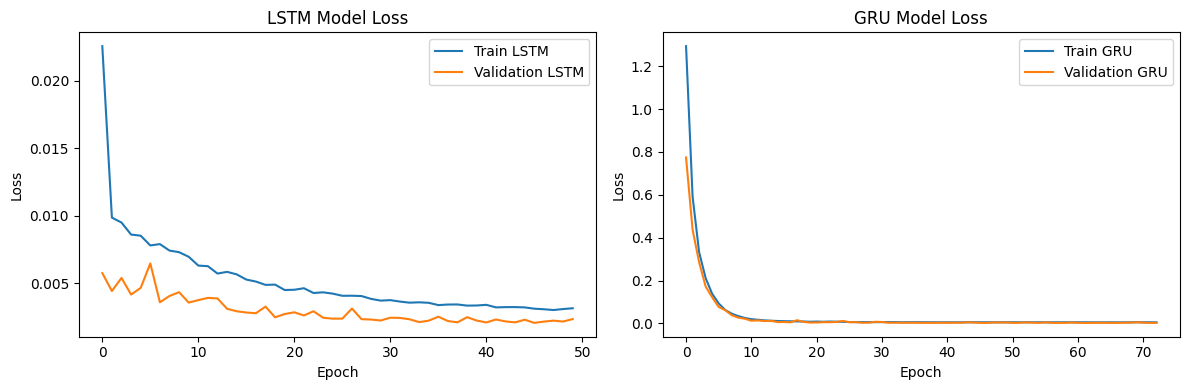

In [122]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot for the first model (e.g., LSTM)
axs[0].plot(training_history.history['loss'], label='Train LSTM')
axs[0].plot(training_history.history['val_loss'], label='Validation LSTM')
axs[0].set_title('LSTM Model Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend(loc='upper right')

# Plot for the second model (e.g., GRU)
axs[1].plot(history_gru.history['loss'], label='Train GRU')
axs[1].plot(history_gru.history['val_loss'], label='Validation GRU')
axs[1].set_title('GRU Model Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')

# Display the plots
plt.tight_layout()  # Adjust the layout to make room for all plot labels
plt.show()


In [123]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("#########################")
print("#          LSTM         #")
print("#########################\n")
# Predict temperatures using the trained model
predictions_lstm = best_trained_model_lstm.predict(test_sequences)

# Calculate evaluation metrics
mae = mean_absolute_error(test_targets, predictions_lstm)
mse = mean_squared_error(test_targets, predictions_lstm)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


print("\n\n#########################")
print("#          GRU          #")
print("#########################\n")
# Predict temperatures using the trained model
predictions_gru = best_trained_model_gru.predict(test_sequences)

# Calculate evaluation metrics
mae = mean_absolute_error(test_targets, predictions_gru)
mse = mean_squared_error(test_targets, predictions_gru)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


#########################
#          LSTM         #
#########################

47/47 [==============================] - 1s 4ms/step
Mean Absolute Error (MAE): 0.03434657834291661
Mean Squared Error (MSE): 0.0019764596607521746
Root Mean Squared Error (RMSE): 0.04445739151988311


#########################
#          GRU          #
#########################

47/47 [==============================] - 1s 4ms/step
Mean Absolute Error (MAE): 0.03851130258346136
Mean Squared Error (MSE): 0.0023372944395477586
Root Mean Squared Error (RMSE): 0.048345573112207066


In [124]:
# Prepare y_true values for inverse transformation
test_targets_copies = np.repeat(test_targets.reshape(-1, 1), test_sequences.shape[-1], axis=-1)
true_temperatures = normalizer.inverse_transform(test_targets_copies)[:, daily_mean_data.columns.get_loc('_tempm')]

# Get LSTM model predictions and convert to actual temperatures
predictions_lstm = best_trained_model_lstm.predict(test_sequences)
predictions_copies_lstm = np.repeat(predictions_lstm, features_count, axis=-1)
predicted_temperatures_lstm = normalizer.inverse_transform(predictions_copies_lstm)[:, daily_mean_data.columns.get_loc('_tempm')]

# Get GRU model predictions and convert to actual temperatures
predictions_gru = best_trained_model_gru.predict(test_sequences)
predictions_copies_gru = np.repeat(predictions_gru, features_count, axis=-1)
predicted_temperatures_gru = normalizer.inverse_transform(predictions_copies_gru)[:, daily_mean_data.columns.get_loc('_tempm')]


47/47 [==============================] - 0s 4ms/step


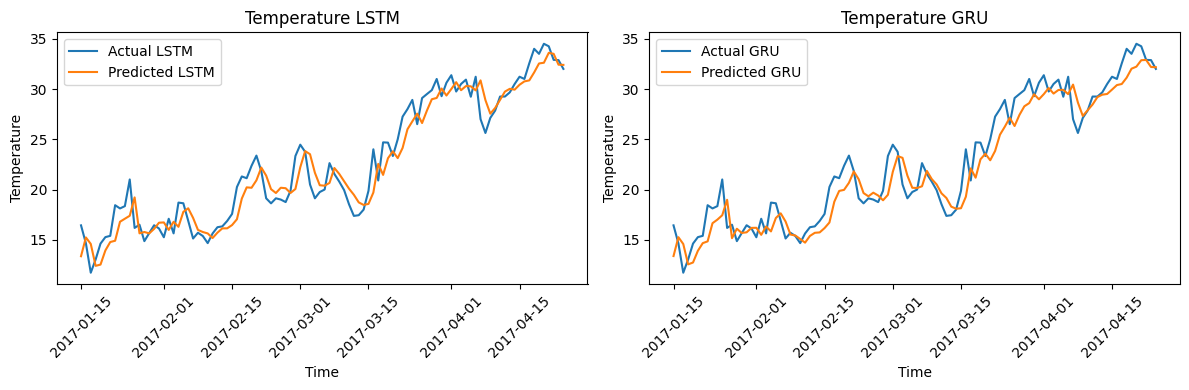

In [125]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot for the first model (e.g., LSTM)
axs[0].plot(daily_mean_data.index[-100:], true_temperatures[-100:], label='Actual LSTM')
axs[0].plot(daily_mean_data.index[-100:], predicted_temperatures_lstm[-100:], label='Predicted LSTM')
axs[0].set_title('Temperature LSTM')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Temperature')
axs[0].legend(loc='upper left')
axs[0].tick_params(axis='x', rotation=45)

# Plot for the second model (e.g., GRU)
axs[1].plot(daily_mean_data.index[-100:], true_temperatures[-100:], label='Actual GRU')
axs[1].plot(daily_mean_data.index[-100:], predicted_temperatures_gru[-100:], label='Predicted GRU')
axs[1].set_title('Temperature GRU')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Temperature')
axs[1].legend(loc='upper left')
axs[1].tick_params(axis='x', rotation=45)

# Display the plots
plt.tight_layout()  # Adjust the layout to make room for all plot labels
plt.show()

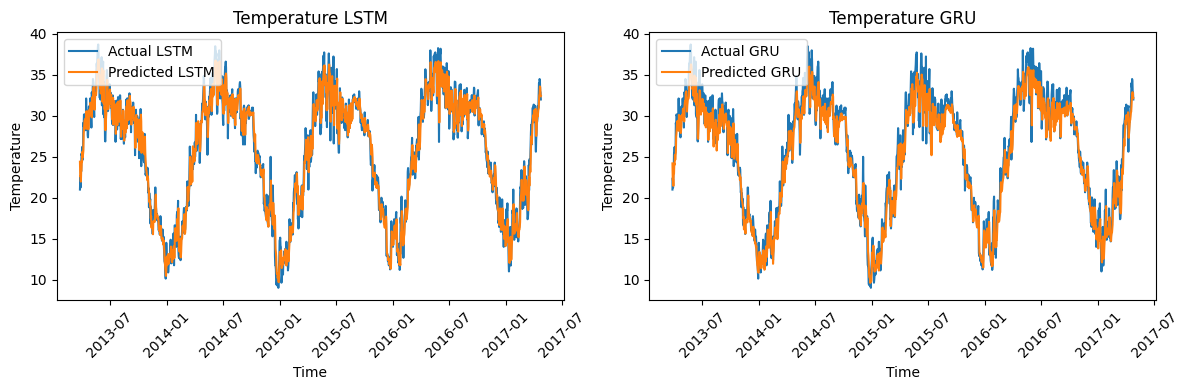

In [126]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot for the first model (e.g., LSTM)
axs[0].plot(daily_mean_data.index[-len(true_temperatures):], true_temperatures, label='Actual LSTM')
axs[0].plot(daily_mean_data.index[-len(true_temperatures):], predicted_temperatures_lstm, label='Predicted LSTM')
axs[0].set_title('Temperature LSTM')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Temperature')
axs[0].legend(loc='upper left')
axs[0].tick_params(axis='x', rotation=45)

# Plot for the second model (e.g., GRU)
axs[1].plot(daily_mean_data.index[-len(true_temperatures):], true_temperatures, label='Actual GRU')
axs[1].plot(daily_mean_data.index[-len(true_temperatures):], predicted_temperatures_gru, label='Predicted GRU')
axs[1].set_title('Temperature GRU')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Temperature')
axs[1].legend(loc='upper left')
axs[1].tick_params(axis='x', rotation=45)

# Display the plots
plt.tight_layout()  # Adjust the layout to make room for all plot labels
plt.show()

In [127]:
# Prepare DataFrame for actual and LSTM predicted temperatures
test_data = pd.DataFrame(true_temperatures, columns=['Actual'])
predictions_data_lstm = pd.DataFrame(predicted_temperatures_lstm, columns=['Predict LSTM'])

# Prepare DataFrame for GRU predicted temperatures
predictions_data_gru = pd.DataFrame(predicted_temperatures_gru, columns=['Predict GRU'])

# Concatenate all DataFrames horizontally
results = pd.concat([test_data, predictions_data_lstm, predictions_data_gru], axis=1)

# Display the first 20 rows of the merged results
results.head(10)


,Actual,Predict LSTM,Predict GRU
0,21.000000,24.402575,24.194416
1,22.428571,22.614084,22.146149
2,21.250000,22.699554,22.265648
3,23.500000,21.971403,21.449810
4,23.200000,23.230742,22.816105
5,25.375000,23.355938,22.903673
6,25.166667,24.524847,24.173870
7,26.200000,24.444069,24.034880
8,24.600000,25.615294,25.229164
9,25.600000,24.947546,24.629143


Now, Let's predict future weather for next 30 days using LSTM

In [128]:
def insert_end(Xin, new_input, time_steps):

    for i in range(time_steps - 1):
        Xin[:, i, :] = Xin[:, i + 1, :]
    Xin[:, time_steps - 1, :] = new_input
    return Xin

In [129]:
from datetime import timedelta

future = 30
time_steps = 30  # As defined in your LSTM model setup

# Forecasting for LSTM Model
forecast_lstm = []
Xin_lstm = test_sequences[-1:,:,:]  # Last sequence from the test set
time_lstm = []

for i in range(future):
    out_lstm = model.predict(Xin_lstm, batch_size=1, verbose=0)
    forecast_lstm.append(out_lstm[0, 0])
    #print(forecast_lstm)
    Xin_lstm = insert_end(Xin_lstm, out_lstm[0, 0], time_steps)
    time_lstm.append(pd.to_datetime(daily_mean_data.index[-1]) + timedelta(days=i + 1))

In [130]:
# For LSTM Model
forecasted_output_lstm = np.asarray(forecast_lstm).reshape(-1, 1)
forecasted_expanded_lstm = np.repeat(forecasted_output_lstm, 7, axis=1)
forecasted_original_scale_lstm = normalizer.inverse_transform(forecasted_expanded_lstm)[:, 6]
forecasted_output_lstm = pd.DataFrame(forecasted_original_scale_lstm, columns=["Forecasted using LSTM"])
date_lstm = pd.DataFrame(time_lstm, columns=["Date"])
df_result_lstm = pd.concat([date_lstm, forecasted_output_lstm], axis=1)

In [131]:
df_result_lstm

,Date,Forecasted using LSTM
0,2017-04-25,32.862144
1,2017-04-26,31.328964
2,2017-04-27,31.172224
3,2017-04-28,31.085522
4,2017-04-29,30.942013
5,2017-04-30,30.653933
6,2017-05-01,30.181847
7,2017-05-02,29.544510
8,2017-05-03,28.785976
9,2017-05-04,27.953461


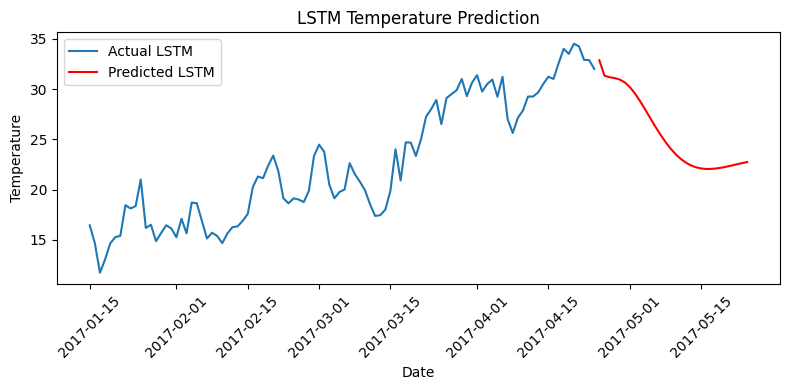

In [132]:
# Create a single plot figure
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust size as needed

# Plot actual and LSTM predicted temperatures
ax.plot(daily_mean_data.index[-100:], true_temperatures[-100:], label='Actual LSTM')
ax.plot(df_result_lstm.set_index('Date')[['Forecasted using LSTM']], "r", label='Predicted LSTM')
ax.set_title('LSTM Temperature Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.legend(loc='upper left')
ax.tick_params(axis='x', rotation=45)  # Rotate date labels for better readability

# Display the plot
plt.tight_layout()  # Adjust the layout to make room for all plot labels
plt.show()

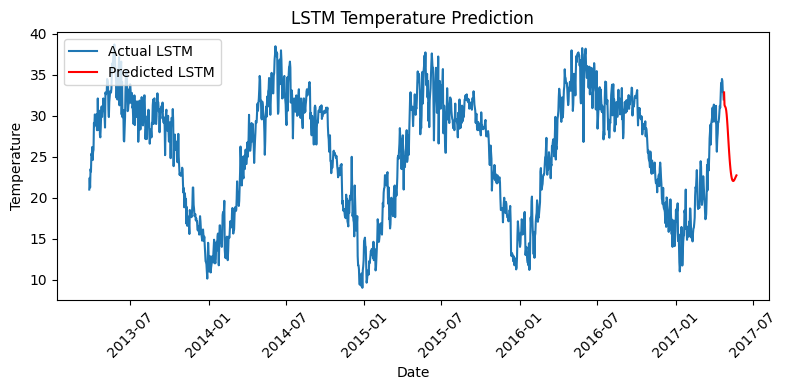

In [133]:
import matplotlib.pyplot as plt

# Create a figure for a single plot
fig, ax = plt.subplots(figsize=(8, 4))  # Adjust size as needed for a single plot

# Plot actual temperatures and LSTM predicted temperatures
ax.plot(daily_mean_data.index[-len(true_temperatures):], true_temperatures[-len(true_temperatures):], label='Actual LSTM')
ax.plot(df_result_lstm.set_index('Date')[['Forecasted using LSTM']], "r", label='Predicted LSTM')
ax.set_title('LSTM Temperature Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.legend(loc='upper left')
ax.tick_params(axis='x', rotation=45)  # Rotate date labels for better readability

# Adjust the layout and display the plot
plt.tight_layout()  # Ensure adequate space for all plot elements
plt.show()
